##  `Multiclass confusion matrix function`
#### By Justin Mackie, jmackie at gmail dot com

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix  #Required input to plot_confusion_matrix
import seaborn as sns

# Inspired by Shay Palachy's function:  https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823
# Used Shay's effective Doctring format.
def plot_confusion_matrix(confusion_matrix, class_names, figsize = (15,6), fontsize=16):
    """
    Plots confusion matrix as a color-encoded Seaborn heatmap.  Zeroes are
    colored white.  Normalized values that are zero when rounded to three
    decimals, Ex. 0.000, will be colored white.  Get more decicmals by
    updating fmt, for example to '0.4f', and updating get_text() value.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object sklearn.metrics.confusion_matrix. 
    class_names: list
        List of class names in the order they index the confusion matrix.
    figsize: tuple
        A pair tuple.  The first value is figure width.  The second
        value is figure height. Defaults to (15,6).
    fontsize: int
        Font size for axes labels. Defaults to 16.
    """        
    #Instantiate Figure
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=figsize)
    plt.subplots_adjust(wspace = 0.3)
        
    # ax1 - Normalized Confusion Matrix    
    #Normalize by dividing (M X M) matrix by (M X 1) matrix.  (M X 1) is row totals.
    conf_matrix_norm = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:,np.newaxis]
    df_cm_norm = pd.DataFrame(conf_matrix_norm, index=class_names, columns=class_names)        
    heatmap = sns.heatmap(df_cm_norm, ax=ax1, cmap='Blues', fmt='.3f', annot=True, annot_kws={"size": fontsize},
              linewidths=2, linecolor='black', cbar=False)
    
    ax1.tick_params(axis='x', labelrotation=0, labelsize=fontsize, labelcolor='black')
    ax1.tick_params(axis='y', labelrotation=0, labelsize=fontsize, labelcolor='black')
    ax1.set_ylim(ax1.get_xlim()[0], ax1.get_xlim()[1])  #Fix messed up ylim
    ax1.set_xlabel('PREDICTED CLASS', fontsize=fontsize, color='black')
    ax1.set_ylabel('TRUE CLASS', fontsize=fontsize, color='black')
    ax1.set_title('Confusion Matrix - Normalized', pad=15, fontsize=fontsize, color='black')
    
    # ax2 - Confusion Matrix - Class Counts
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)    
    heatmap = sns.heatmap(df_cm, ax=ax2, cmap='Blues', fmt='d', annot=True, annot_kws={"size": fontsize+4},
              linewidths=2, linecolor='black', cbar=False)   
    
    ax2.tick_params(axis='x', labelrotation=0, labelsize=fontsize, labelcolor='black')
    ax2.tick_params(axis='y', labelrotation=0, labelsize=fontsize, labelcolor='black')
    ax2.set_ylim(ax1.get_xlim()[0], ax1.get_xlim()[1])
    ax2.set_xlabel('PREDICTED CLASS', fontsize=fontsize, color='black')
    ax2.set_ylabel('TRUE CLASS', fontsize=fontsize, color='black')
    ax2.set_title('Confusion Matrix - Class Counts', pad=15, fontsize=fontsize, color='black')    
  
    for text in ax1.texts:
        if text.get_text() == '0.000':
            text.set_color(color='white')            
    for text in ax2.texts:
        if text.get_text() == '0':
            text.set_color(color='white')

#### Example data for confusion matrix

In [2]:
#Make categorical dataframe of true categories vs predicted categories.
categdf=pd.DataFrame({
                 'y_true': ["cat", "ant", "cat", "cat", "ant", "bird"],
                 'y_pred': ["ant", "ant", "cat", "cat", "ant", "cat"]
                })
categdf['correct'] = categdf['y_true']==categdf['y_pred']

#### Does true class match predicted class?

In [3]:
display(categdf.style.highlight_max(color='#c7fdb5', subset=pd.IndexSlice[:, ['correct']], axis=0))

,y_true,y_pred,correct
0,cat,ant,False
1,ant,ant,True
2,cat,cat,True
3,cat,cat,True
4,ant,ant,True
5,bird,cat,False


### First, make sklearn confusion matrix of true vs predicted classes/categories:

In [4]:
class_labels = ["ant", "bird", "cat"]
cm=confusion_matrix(categdf['y_true'], categdf['y_pred'], labels=class_labels)

print('\n*** Sklearn confusion_matrix below.  It is challenging to understand. ***\n')
print(cm)
print('\nThe confusion_matrix labels are:', class_labels,  '\n...But, how do we read it?')


*** Sklearn confusion_matrix below.  It is challenging to understand. ***

[[2 0 0]
 [0 0 1]
 [1 0 2]]

The confusion_matrix labels are: ['ant', 'bird', 'cat'] 
...But, how do we read it?


### Solution: Plot confusion matrix function


*** plot_confusion_matrix() function prints heatmaps with captions to improve readability! ***




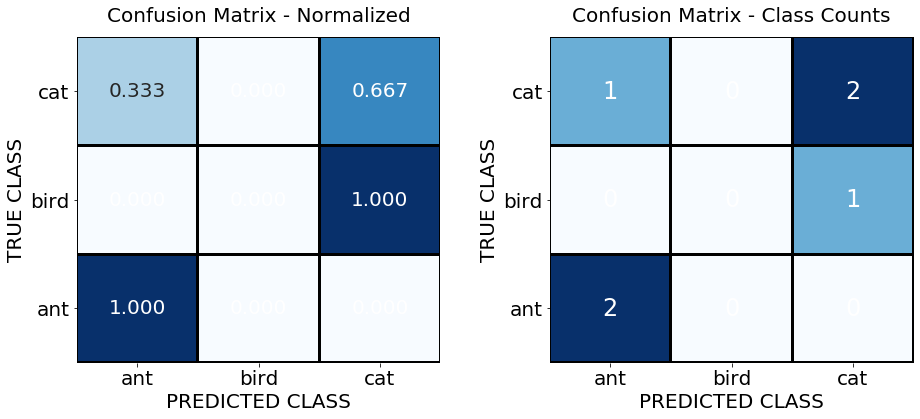

In [5]:
#Visualize the confusion matrix using my function.  Both normalized and counts format.
#Class pairs are repeated in this format -- for example: (bird, cat) and (cat, bird).
#The redundant pair is ignored by hiding the zeroes with white text.

print('\n*** plot_confusion_matrix() function prints heatmaps with captions to improve readability! ***\n\n')
plot_confusion_matrix(confusion_matrix=cm, class_names=class_labels, fontsize=20)

* ##### Note:  The labels/class names in the sklearn matrix and the plot must be in the same order.